In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

Import data

In [79]:
year1 = pd.read_csv("year1.csv", encoding= 'unicode_escape')
year2 = pd.read_csv("year2.csv", encoding= 'unicode_escape')

concatenate data

In [80]:
print(year1.shape)
print(year2.shape)
data = pd.concat([year1, year2]).reset_index(drop=True)
print(data.shape)

(525461, 8)
(541910, 8)
(1067371, 8)


explore data

In [81]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom


In [82]:
data.dtypes

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object

In [83]:
start = pd.to_datetime(data.at[0,'InvoiceDate']).round('24H')
start

Timestamp('2009-12-01 00:00:00')

In [84]:
days = pd.to_numeric((pd.to_datetime(data['InvoiceDate']).round('24H') - start).dt.days)
days

0            0
1            0
2            0
3            0
4            0
          ... 
1067366    739
1067367    739
1067368    739
1067369    739
1067370    739
Name: InvoiceDate, Length: 1067371, dtype: int64

In [85]:
data['Days'] = days

In [86]:
n = pd.to_numeric(np.sin((data['Days']/365.0)*np.pi*2))
n

0          0.000000
1          0.000000
2          0.000000
3          0.000000
4          0.000000
             ...   
1067366    0.154309
1067367    0.154309
1067368    0.154309
1067369    0.154309
1067370    0.154309
Name: Days, Length: 1067371, dtype: float64

In [87]:
n.describe()

count    1.067371e+06
mean    -7.715473e-02
std      6.524277e-01
min     -9.999907e-01
25%     -6.807734e-01
50%     -1.202080e-01
75%      4.862727e-01
max      9.999907e-01
Name: Days, dtype: float64

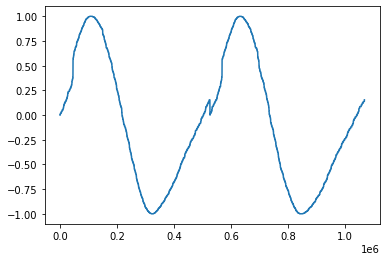

In [88]:
plt.plot(n)

In [89]:
data['InvoiceDate'] = n

In [90]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Days
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,0.0,6.95,13085.0,United Kingdom,0
1,489434,79323P,PINK CHERRY LIGHTS,12,0.0,6.75,13085.0,United Kingdom,0
2,489434,79323W,WHITE CHERRY LIGHTS,12,0.0,6.75,13085.0,United Kingdom,0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,0.0,2.10,13085.0,United Kingdom,0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,0.0,1.25,13085.0,United Kingdom,0


In [91]:
print(data["Customer ID"].unique().shape)
dataById = [data[data["Customer ID"] == Id] for Id in data["Customer ID"].unique()]

(5943,)


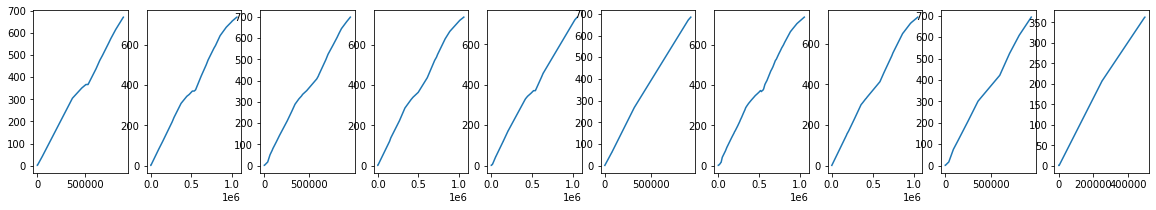

In [134]:
plots = 10
offset = 40
axs = plt.subplots(1,plots,figsize=(plots*2,3))[1]

for n in range(plots):
    axs[n].plot(dataById[n+offset]['Days'])


In [93]:
validData = pd.DataFrame(data.dropna(subset=['Customer ID']))
validData.describe()

,Quantity,InvoiceDate,Price,Customer ID,Days
count,824364.000000,824364.000000,824364.000000,824364.000000,824364.000000
mean,12.414574,-0.098519,3.676800,15324.638504,397.092422
std,188.976099,0.656993,70.241388,1697.464450,218.845093
min,-80995.000000,-0.999991,0.000000,12346.000000,0.000000
25%,2.000000,-0.711657,1.250000,13975.000000,217.000000
50%,5.000000,-0.154309,1.950000,15255.000000,368.000000
75%,12.000000,0.440519,3.750000,16797.000000,604.000000
max,80995.000000,0.999991,38970.000000,18287.000000,739.000000


In [121]:
churned = []
for Id in dataById:
    if not list(Id['Days']):
        continue
    ds = list(Id['Days'])
    current = ds[0]
    for ind, day in enumerate(ds):
        n = ind
        while n < (len(ds) - ind) and (ds[n]-day) < 100:
            if 7 <= (ds[n]-day):
                churned.append(0)
                break
            n += 1
        else:
            churned.append(1)
    current = day
validData['Churned'] = churned

In [122]:
validData.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Days,Churned
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,0.0,6.95,13085.0,United Kingdom,0,0
1,489434,79323P,PINK CHERRY LIGHTS,12,0.0,6.75,13085.0,United Kingdom,0,0
2,489434,79323W,WHITE CHERRY LIGHTS,12,0.0,6.75,13085.0,United Kingdom,0,0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,0.0,2.10,13085.0,United Kingdom,0,0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,0.0,1.25,13085.0,United Kingdom,0,0


In [123]:
validDataById = [validData[validData["Customer ID"] == Id] for Id in validData["Customer ID"].unique()]

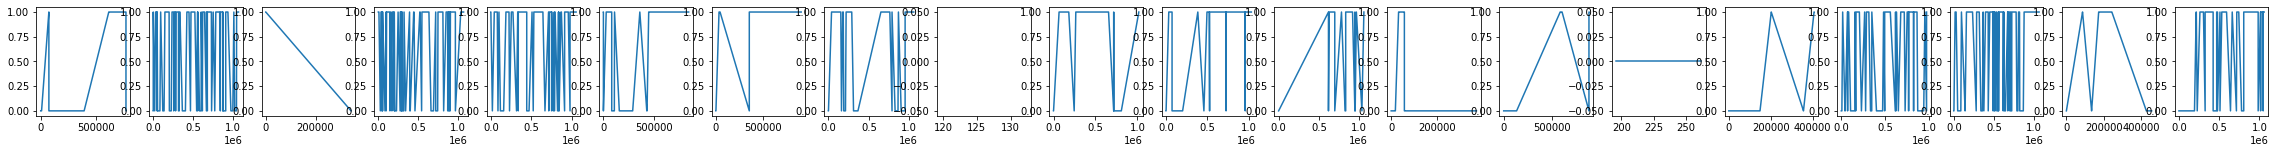

In [131]:
plots = 20
offset = 0
axs = plt.subplots(1,plots,figsize=(plots*2,2))[1]

for n in range(plots):
    axs[n].plot(validDataById[n+offset]['Churned'])


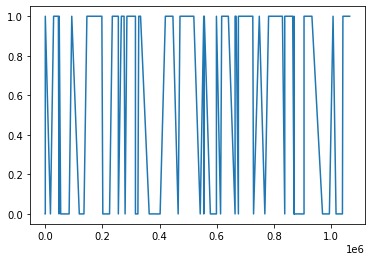

In [132]:
plt.plot(validDataById[1]['Churned'])